# Introducción 

La base de datos que se utilizará en este reto es la de Telecom X, que contiene información sobre clientes, suscripciones y servicios de telecomunicaciones. El objetivo es realizar un análisis exploratorio de los datos para identificar patrones y tendencias en el comportamiento de los clientes, así como para detectar posibles problemas o áreas de mejora en los servicios ofrecidos. 

Para ello, se utilizarán técnicas de limpieza y transformación de datos, así como herramientas de visualización y análisis estadístico. El análisis se centrará en aspectos como la distribución de los clientes por tipo de suscripción, el uso de servicios, la satisfacción del cliente y la retención de clientes.

El propósito general de este reto es encontrar patrones de personas que han abandono la empresa y que han permanecido en la empresa, para así poder identificar las características de los clientes que abandonan la empresa y las que permanecen.

## Diccionario de variables
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico 
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns 
import requests
import json
import plotly.express as px 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Lectura de datos

In [7]:
df = pd.read_csv('Base_datos_tratada.csv')

In [8]:
df.drop(columns= 'customerID', inplace=True)

In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

# Analisis Dirigido y de Correlación de las variables

## Distribución de las variables numéricas

In [11]:
def ancho_bin(df,columna):
    q75,q25 = np.percentile(df[columna],[75,25])
    iqr = q75-q25
    ancho = 2*iqr*np.power(len(df[columna]),-1/3)
    return ancho

In [12]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

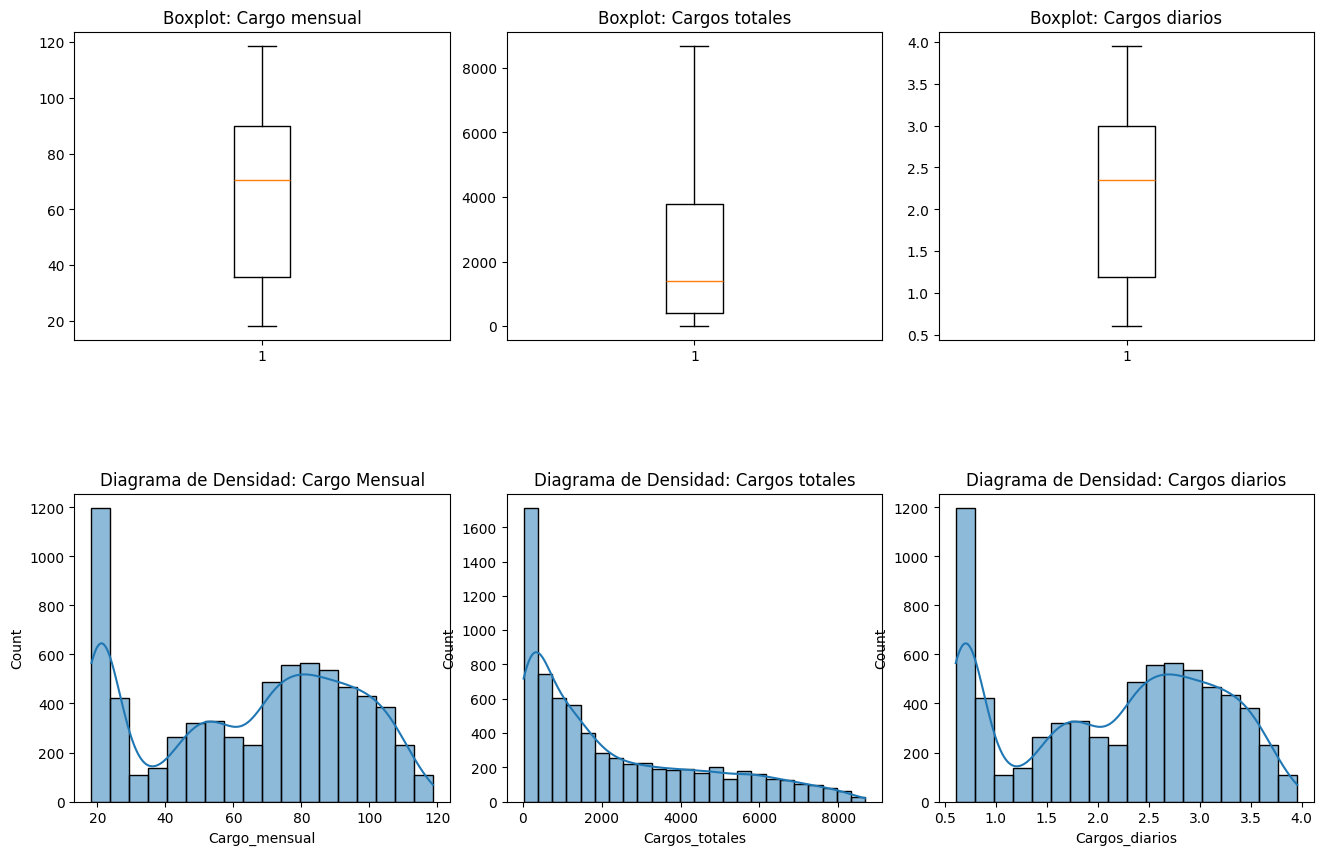

In [13]:
fig, ax = plt.subplots(2,3, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)
ax[0,0].boxplot(x = df['Cargo_mensual'])
ax[0,0].set_title('Boxplot: Cargo mensual')

ax[0,1].boxplot(x = df['Cargos_totales'])
ax[0,1].set_title('Boxplot: Cargos totales')

ax[0,2].boxplot(x = df['Cargos_diarios'])
ax[0,2].set_title('Boxplot: Cargos diarios')



sns.histplot(data=df, x='Cargo_mensual', kde=True, binwidth=ancho_bin(df, 'Cargo_mensual'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Cargo Mensual')

sns.histplot(data= df, x = 'Cargos_totales',kde= True, binwidth= ancho_bin(df,'Cargos_totales'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Cargos totales')

sns.histplot(data= df, x = 'Cargos_diarios',kde= True, binwidth= ancho_bin(df,'Cargos_diarios'), ax = ax[1,2])
ax[1,2].set_title('Diagrama de Densidad: Cargos diarios')


plt.show()

In [15]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

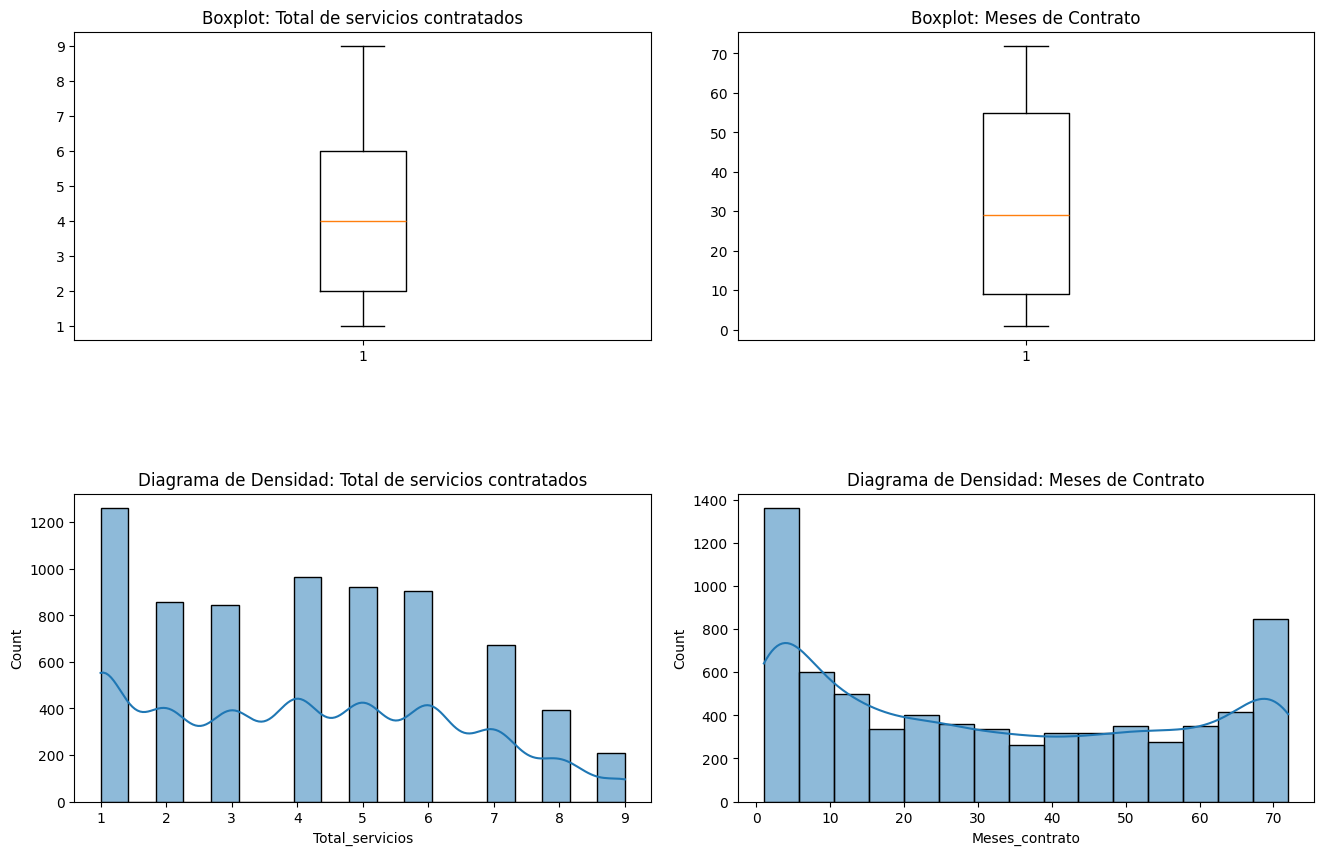

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)


ax[0,0].boxplot(x = df['Total_servicios'])
ax[0,0].set_title('Boxplot: Total de servicios contratados')

ax[0,1].boxplot(x = df['Cargos_totales'])
ax[0,1].set_title('Boxplot: Meses de Contrato')


sns.histplot(data=df, x='Total_servicios', kde=True, binwidth=ancho_bin(df, 'Total_servicios'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Total de servicios contratados')

sns.histplot(data= df, x = 'Cargos_totales',kde= True, binwidth= ancho_bin(df,'Cargos_totales'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Meses de Contrato')
plt.show()

In [19]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios',
       'Total_servicios'],
      dtype='object')

## Analisis de correlación

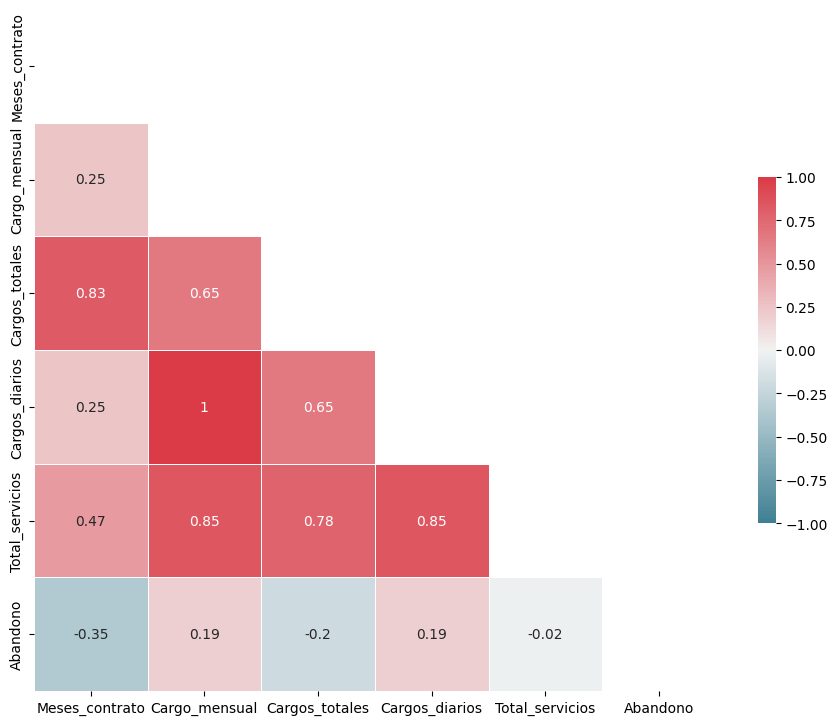

In [44]:
df_num = df[['Meses_contrato','Cargo_mensual','Cargos_totales','Cargos_diarios','Total_servicios', 'Abandono']]

# Calculate the correlation matrix
corr = df_num.corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})




# Mostrar el mapa de calor (heatmap)
plt.show()

In [35]:
df_contrato_abandono = df[['Meses_contrato', 'Abandono']]

px.box(data_frame= df_contrato_abandono, x = 'Meses_contrato', color= 'Abandono')

In [37]:
df_cargo_mensual_abandono = df[['Cargo_mensual', 'Abandono']]

px.box(data_frame= df_cargo_mensual_abandono, x = 'Cargo_mensual', color= 'Abandono')

In [40]:
df_cargos_diarios_abandono = df[['Cargos_diarios', 'Abandono']]

px.box(data_frame= df_cargos_diarios_abandono, x = 'Cargos_diarios', color= 'Abandono')

In [39]:
df_cargos_totales_abandono = df[['Cargos_totales', 'Abandono']]

px.box(data_frame= df_cargos_totales_abandono, x = 'Cargos_totales', color= 'Abandono')

In [43]:
df_servicios_abandono = df[['Total_servicios', 'Abandono']]

px.box(data_frame= df_servicios_abandono, x = 'Total_servicios', color= 'Abandono')

Las variables númericas mostrarón tener una relación baja con la variable objetivo "Abandono", en particula la variable ``Total_servicios`` de igual forma esta variable mostro tener una alta relación con el resto de variables numéricas, por lo que se decidió eliminarla del análisis. Por otro lado las variables ``Cargo_mensual`` y ``Cargos_diarios`` mostarón tener una relación perfecta entre ellas, esto se debe a que la variable ``Cargos_diarios`` es el resultado de dividir la variable ``Cargo_mensual`` entre 30, por lo que se decidió eliminar la variable ``Cargos_diarios`` del análisis.

In [70]:
df.drop(columns= ['Cargos_diarios', 'Total_servicios'], inplace= True)
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales'],
      dtype='object')

## Distribución de las variable respuesta 

In [75]:
df.value_counts('Abandono', normalize=True).round(2)*100

Abandono
0    73.0
1    27.0
Name: proportion, dtype: float64

C:\Users\erik-\AppData\Local\Temp\ipykernel_11516\1057276694.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



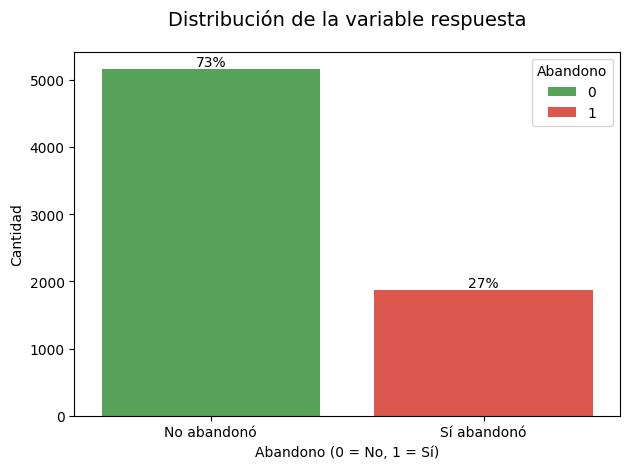

In [68]:
colores = {0: "#4CAF50", 1: "#F44336"}  # Verde y rojo

g = sns.countplot(
    data=df,
    x='Abandono',
    hue='Abandono',
    palette=colores
)

# Título y ejes
g.set_title('Distribución de la variable respuesta', y=1.05, fontsize=14)
g.set(xlabel='Abandono (0 = No, 1 = Sí)', ylabel='Cantidad')


total = len(df)
# Añadir etiquetas de datos sobre las barras
for p in g.patches:
    height = p.get_height()
    if height > 0:
        porcentaje = height / total * 100
        g.annotate(
            f'{int(round(porcentaje))}%',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10
        )

# Mejorar la leyenda
g.legend_.set_title("Abandono")
g.set_xticklabels(['No abandonó', 'Sí abandonó'])

plt.tight_layout()
plt.show()

Podemos identificar que la variable respuesta ``Abandono`` tiene una distribución muy desbalanceada, ya que el 73% de los clientes no han abandonado la empresa, mientras que el 27% si lo ha hecho. Esto puede ser un problema para los modelos de clasificación, ya que pueden tener una tendencia a predecir más la clase mayoritaria. Por lo tanto se aplicará una técnica de balanceo de clases para mejorar el rendimiento del modelo. 

Particularmente, se utilizará la técnica de sobremuestreo, especificamente la técnica de SMOTE (Synthetic Minority Over-sampling Technique).

# Preparación de los datos 

## Normalización de las variables numéricas

In [59]:
normalizador = MinMaxScaler()
columnas_a_normalizar = ['Cargo_mensual', 'Cargos_totales', 'Cargos_diarios']
X_normalizada = X.copy()
X_normalizada[columnas_a_normalizar] = normalizador.fit_transform(X[columnas_a_normalizar])


## Variables categóricas

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
columnas_cat = list(X_normalizada.select_dtypes(include='object').columns)

one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary', dtype= np.int64), columnas_cat),
                                  remainder= 'passthrough', sparse_threshold=0)


X_normalizada = one_hot.fit_transform(X_normalizada)
X_codificada = pd.DataFrame(X_normalizada,columns=one_hot.get_feature_names_out())

In [62]:
X_codificada

,onehotencoder__Genero_Male,onehotencoder__Tipo_servicio_internet_DSL,onehotencoder__Tipo_servicio_internet_Fibra Optica,onehotencoder__Tipo_servicio_internet_Sin servicio,onehotencoder__Tipo_contrato_Dos años,onehotencoder__Tipo_contrato_Mes a mes,onehotencoder__Tipo_contrato_Un año,onehotencoder__Metodo_pago_Cheque electrónico,onehotencoder__Metodo_pago_Cheque por enviado por correo,onehotencoder__Metodo_pago_Tarjeta de crédito (automática),...,remainder__Seguridad_en_linea,remainder__Respaldo_en_linea,remainder__Proteccion_dispositivo,remainder__Soporte_tecnico,remainder__TV_en_streaming,remainder__Peliculas_en_streaming,remainder__Factura_en_linea,remainder__Cargo_mensual,remainder__Cargos_totales,remainder__Cargos_diarios
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.471144
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.414428
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239,0.553731
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670,0.793532
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687,0.653234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556,0.367164
7028,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043,0.665174
7029,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,0.318905
7030,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831,0.493532


## Normalizacion de variable respuesta

In [ ]:
y.value_counts()

Abandono
0    5163
1    1869
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_codificada.shape[0]

7032

In [ ]:
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X_codificada,y)

In [ ]:
print(X_balanceada.shape[0])
print(y_balanceada.value_counts())

10326
Abandono
0    5163
1    5163
Name: count, dtype: int64


## Correlación de las variables 

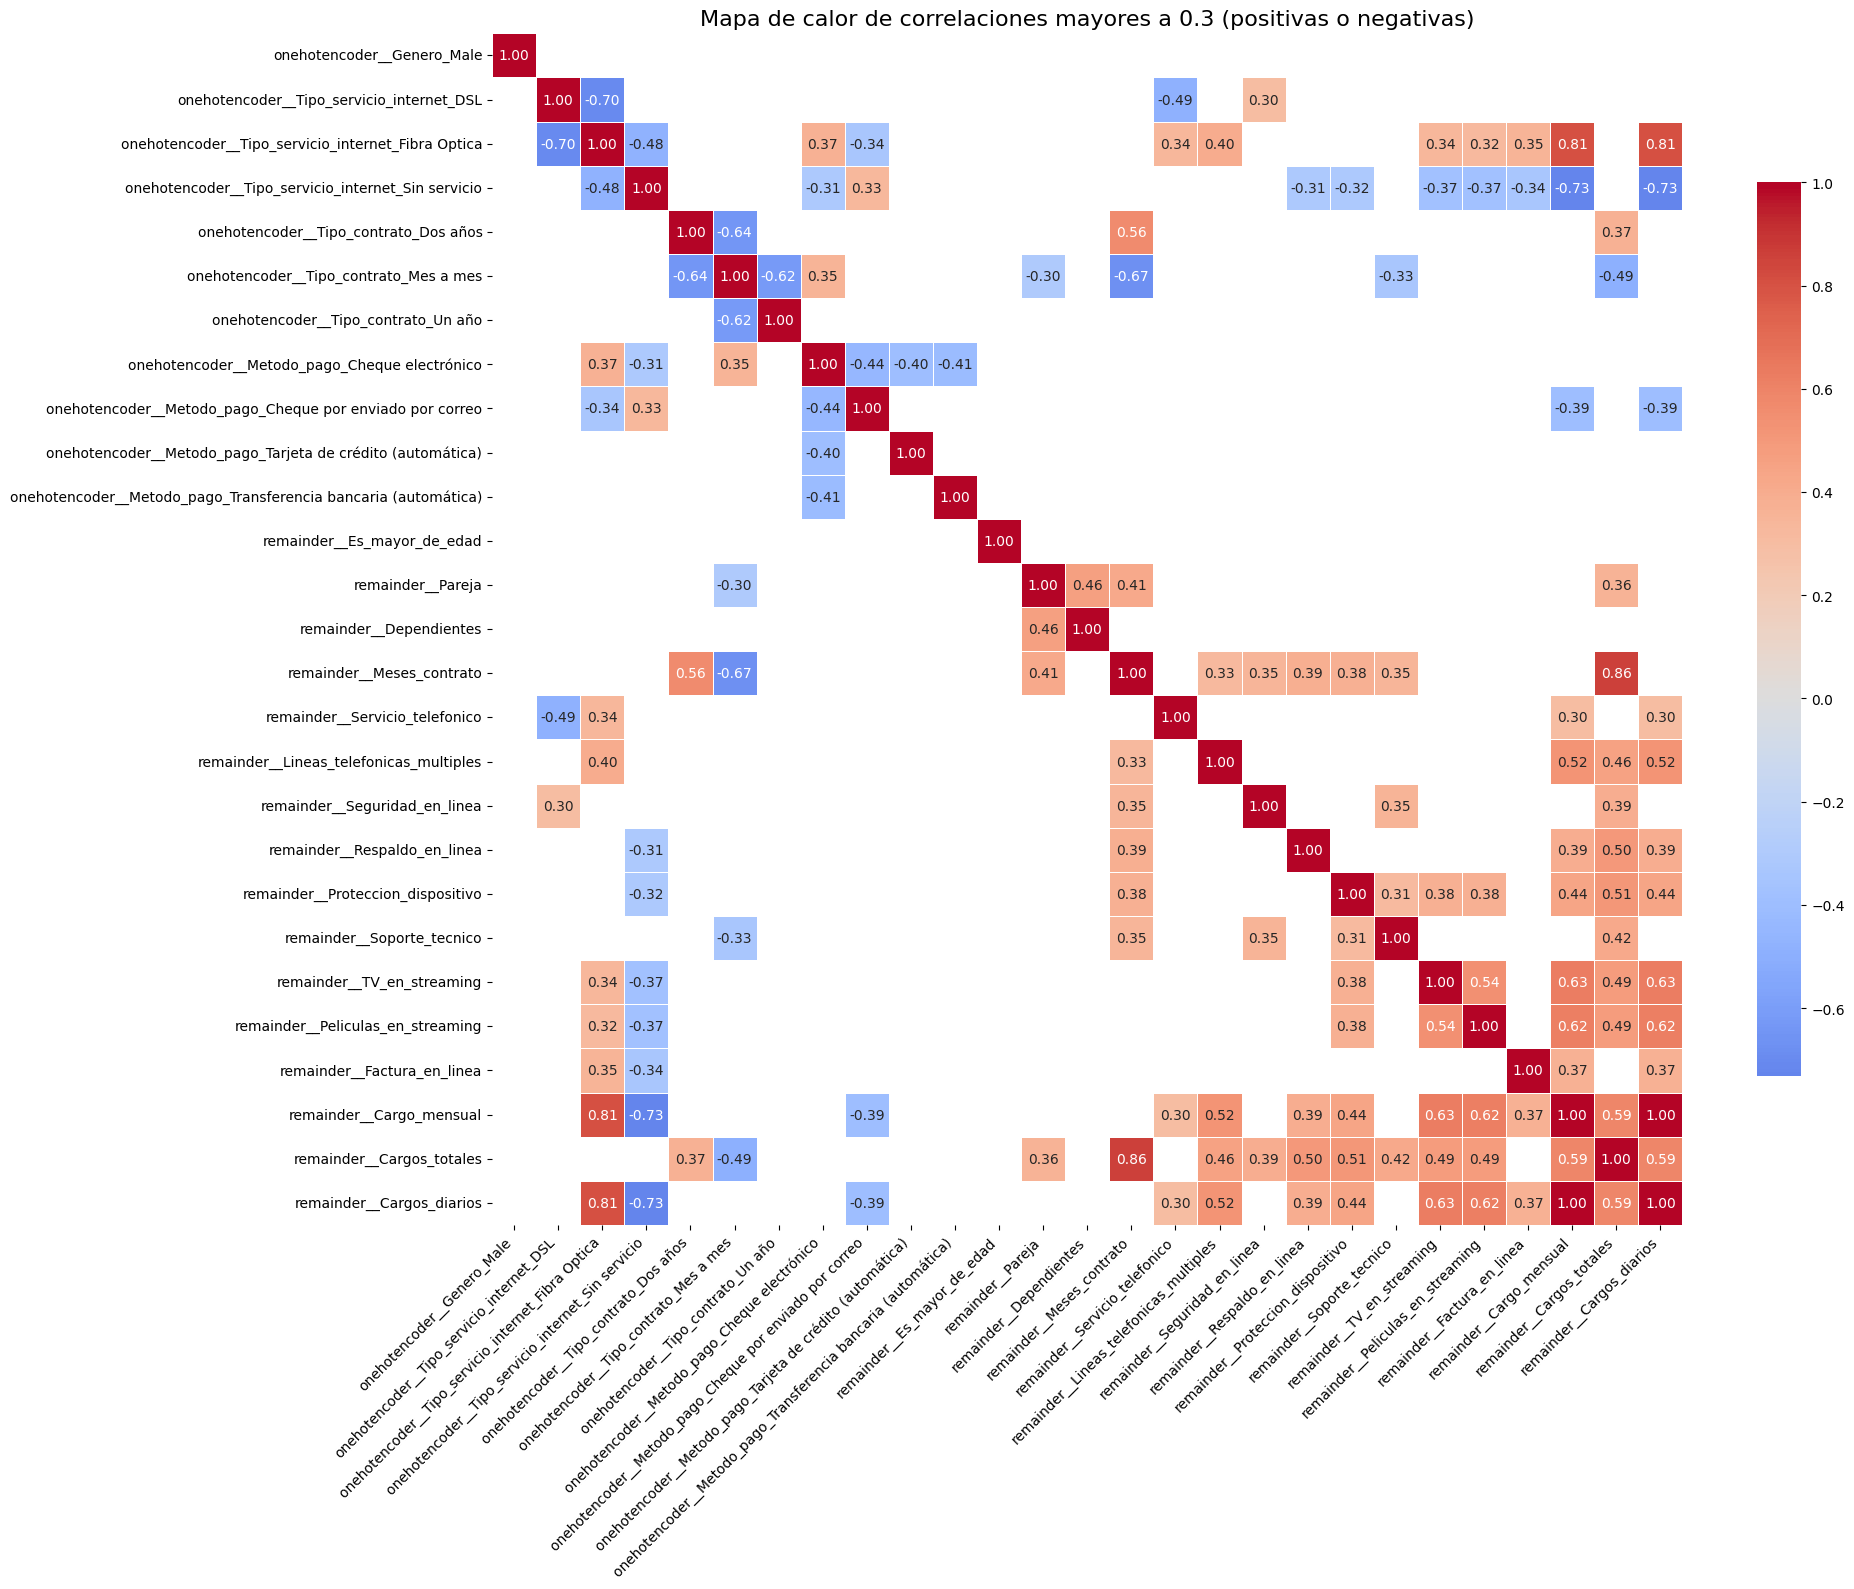

In [ ]:
correlation_matrix = X_balanceada.corr()

mask = np.abs(correlation_matrix) < 0.3
correlation_filtered = correlation_matrix.mask(mask)

# Gráfico de calor con números visibles
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_filtered,
            cmap='coolwarm',
            annot=True,             # Mostrar valores
            fmt=".2f",              # Dos decimales
            center=0, 
            linewidths=0.5,         # Separadores entre celdas
            cbar_kws={"shrink": 0.75})  # Barra de color más compacta

plt.title('Mapa de calor de correlaciones mayores a 0.3 (positivas o negativas)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Modelado predictivo

### Separación de variables explicativas y variable respuesta

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 70% entrenamiento, 15% test y 15% validación

oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X_codificada,y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.model_selection import StratifiedKFold, cross_validate




In [285]:
def evaluacion_modelos(y_test,y_pred):
    print(f'Exactitud: {accuracy_score(y_test, y_pred)}')
    print(f'Precisión: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'F1 Score: {f1_score(y_test,y_pred)}')
    matriz_confusion_modelo = confusion_matrix(y_test,y_pred)
    visualizacion_matriz_confusion = ConfusionMatrixDisplay(matriz_confusion_modelo, display_labels=['No Abandono', 'Abadono'])
    visualizacion_matriz_confusion.plot();



Exactitud: 0.500322788896062
Precisión: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\erik-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



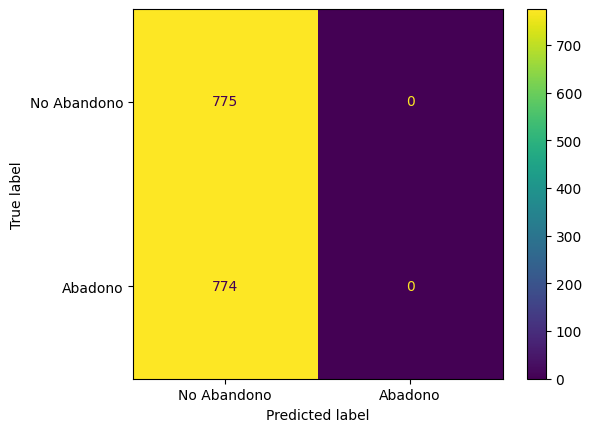

In [ ]:
modelo_dummy = DummyClassifier()

columnas_cat = list(X_normalizada.select_dtypes(include='object').columns)

preprocesador = ColumnTransformer(['cat', OneHotEncoder(drop= 'if_binary'), columnas_cat])

pipiline_dummy = imbpipline([
    ('preprocesador', preprocesador),
    ('smote', SMOTE(random_state= 42)),
    ('dummy', modelo_dummy(random_state=42))

])
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 5)
cv_resultados_dummy = cross_validate(pipiline_dummy,X,y,cv = skf)


Exactitud: 0.7837314396384765
Precisión: 0.7839586028460543
Recall: 0.7829457364341085
F1 Score: 0.7834518422753717


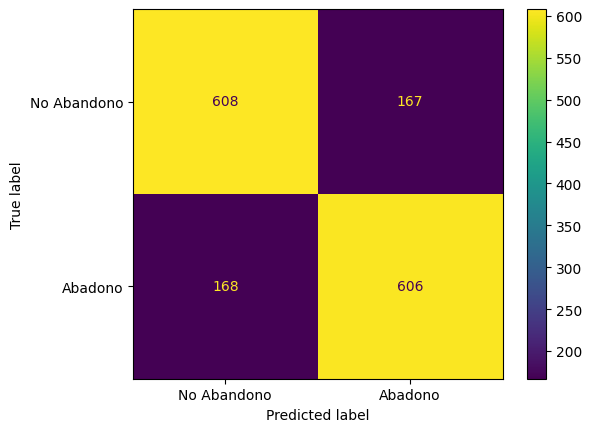

In [287]:
modelo_arbol = DecisionTreeClassifier(random_state= 5)
modelo_arbol.fit(X_train,y_train)
y_pred_arbol = modelo_arbol.predict(X_val)

resultados_arbol = evaluacion_modelos(y_val,y_pred_arbol)


Exactitud: 0.8231116849580374
Precisión: 0.8342245989304813
Recall: 0.8062015503875969
F1 Score: 0.8199737187910644


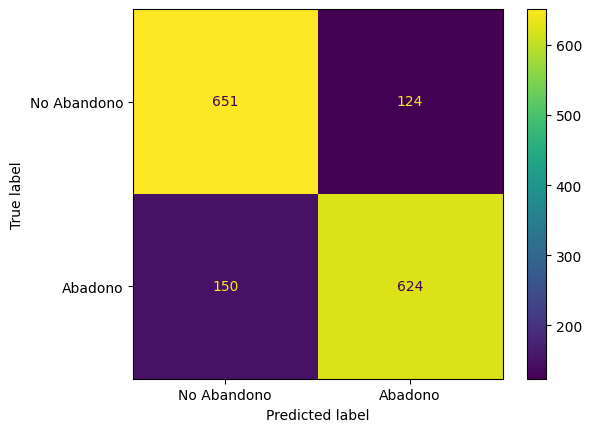

In [288]:
modelo_random = RandomForestClassifier(random_state= 5)
modelo_random.fit(X_train,y_train)
y_pred_random = modelo_random.predict(X_val)

resultados_random = evaluacion_modelos(y_val,y_pred_random)


Exactitud: 0.7740477727566172
Precisión: 0.7289416846652268
Recall: 0.872093023255814
F1 Score: 0.7941176470588235


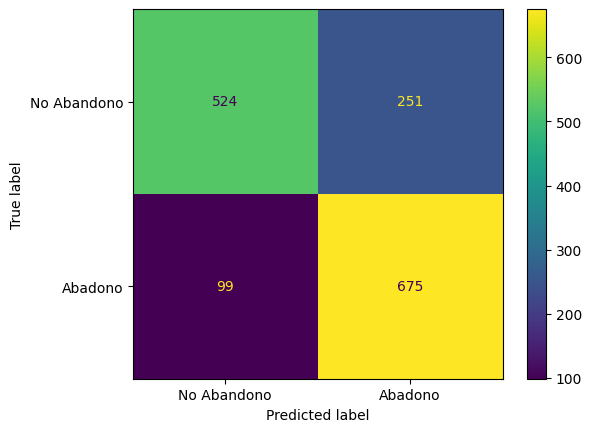

In [289]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train,y_train)
y_pred_knn = modelo_knn.predict(X_val)

resultados_knn = evaluacion_modelos(y_val,y_pred_knn)

Exactitud: 0.7734021949644933
Precisión: 0.758873929008568
Recall: 0.8010335917312662
F1 Score: 0.7793840351979887


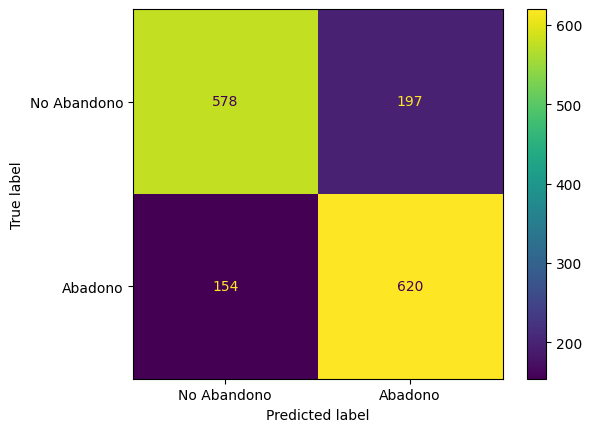

In [290]:
modelo_logistic = LogisticRegression(random_state=5)
modelo_logistic.fit(X_train,y_train)
y_pred_logistic = modelo_logistic.predict(X_val)

resultados_logistic = evaluacion_modelos(y_val,y_pred_logistic)